In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
# TODO Take the dash out of the name to avoid this hackery
import importlib  
rq = importlib.import_module("range-query")

In [76]:
def epsilon_gen(num):
    epsilons = np.geomspace(0.2,1,num)
    return np.delete(epsilons, 0)

In [77]:
adult = pd.read_csv('https://github.com/jnear/cs3110-data-privacy/raw/main/homework/adult_with_pii.csv')

In [78]:
lst = rq.build_tree(0, 100)
df = adult['Age']
tree=rq.counts(lst,df)
noisy_tree = rq.noisy_counts(tree, 1.0)

In [79]:
def create_workload(low: int, high: int, n: int) -> list[(int, int)]:
    result = []
    for _ in range(n):
        a = np.random.randint(low, high)
        result.append((a, np.random.randint(a, high)))

    return result

In [80]:
def control_query(series: pd.Series, a: int, b: int, epsilon: float) -> int:
    np.sum(series)

In [81]:
workloads = create_workload(0, 100, 50)

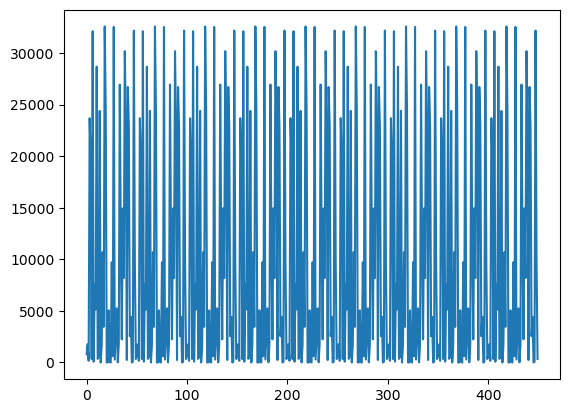

In [82]:
lst = rq.build_tree(0, 100)
df = adult['Age']
lst=rq.counts(lst,df)
pl=[]
epsilons=rq.epsilon_gen(10)
epsilons = np.delete(epsilons, 0)
for epsilon in epsilons:
    for workload in workloads:    
        noisy_tree=rq.noisy_counts(lst,epsilon)        
        pl.append(rq.query(noisy_tree, workload[0], workload[1]))
        
plt.plot(pl)

[0.20327796 0.20660965 0.20999594 0.21343774 0.21693594 0.22049148
 0.22410529 0.22777834 0.23151158 0.23530601 0.23916263 0.24308247
 0.24706654 0.25111592 0.25523166 0.25941486 0.26366662 0.26798806
 0.27238034 0.2768446  0.28138203 0.28599383 0.29068121 0.29544543
 0.30028772 0.30520938 0.3102117  0.31529601 0.32046366 0.325716
 0.33105442 0.33648034 0.34199519 0.34760043 0.35329753 0.35908801
 0.3649734  0.37095524 0.37703513 0.38321466 0.38949548 0.39587924
 0.40236762 0.40896235 0.41566517 0.42247784 0.42940218 0.43644
 0.44359317 0.45086357 0.45825314 0.46576383 0.47339761 0.48115651
 0.48904257 0.49705789 0.50520457 0.51348478 0.5219007  0.53045455
 0.5391486  0.54798515 0.55696652 0.5660951  0.57537329 0.58480355
 0.59438837 0.60413028 0.61403186 0.62409573 0.63432454 0.644721
 0.65528786 0.6660279  0.67694397 0.68803896 0.69931579 0.71077744
 0.72242695 0.73426739 0.7463019  0.75853364 0.77096587 0.78360185
 0.79644494 0.80949852 0.82276605 0.83625103 0.84995703 0.86388766
 0

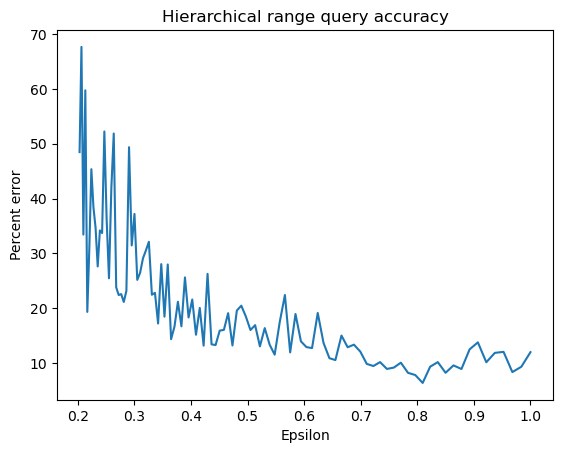

In [87]:
epsilons=epsilon_gen(100)
workloads = create_workload(0, 100, 100000)
ys = []
for epsilon in epsilons:
    noisy_tree = rq.noisy_counts(lst, epsilon)
    pct_errs = []
    for workload in workloads:
        true_cnt = rq.query(noisy_tree, workload[0], workload[1])
        noisy_cnt = rq.noisy_query(noisy_tree, workload[0], workload[1])
        if true_cnt > 0:
            pct_err=np.abs(true_cnt - noisy_cnt) / true_cnt * 100
            if pct_err :
                pct_errs.append(pct_err)
    #print(pct_errs)
    pct_err = sum(pct_errs) / len(pct_errs)
    ys.append(pct_err)

print(epsilons)
#print(ys)
plt.plot(epsilons, ys)
plt.title('Hierarchical range query accuracy')
plt.xlabel('Epsilon')
plt.ylabel('Percent error')
plt.show()